In [3]:
import pandas as pd

In [4]:
raw_data = pd.read_csv('./data/EF_battles_corrected.csv', parse_dates=['start', 'end'])

In [5]:
# data.columns = [el.replace('old_metrics ', '').strip().replace('Commanders and leaders.', 'commanders.') for el in data.columns.tolist()]

In [6]:
cols = ['name','allies killed', 'axis killed', 'allies tanks', 'axis tanks', 'allies airplane', 'axis airplane',
        'Lattitude', 'Longitude', 'start', 'end', 'Location',  'url', 'parent']

In [7]:
data = raw_data[cols].set_index('name')

In [8]:
data.head(3)

,allies killed,axis killed,allies tanks,axis tanks,allies airplane,axis airplane,Lattitude,Longitude,start,end,Location,url,parent
name,,,,,,,,,,,,,
Battle of Westerplatte,21.0,400.0,0,0,0,0,54.4075,18.67139,1939-09-01,1939-09-01,"Westerplatte, harbor of Free City of Danzig54°...",https://en.wikipedia.org/wiki/Battle_of_Wester...,German Invasion of Poland
Battle of Mokra,500.0,800.0,1,50,0,0,NaN,NaN,1939-09-01,1939-09-01,"Mokra, Kielce Voivodeship, Poland",https://en.wikipedia.org/wiki/Battle_of_Mokra,German Invasion of Poland
Battle of Mlawa,1200.0,1800.0,0,72,0,0,NaN,NaN,1939-09-01,1939-09-01,"Near Mława, Warsaw Voivodeship, Poland",https://en.wikipedia.org/wiki/Battle_of_Mlawa,German Invasion of Poland


# Descriptive Statistics

In [9]:
kill_cols = ['allies killed', 'axis killed']
data['killed total'] = data[kill_cols].sum(1)
data['killed total'].sort_values(ascending=False).head(3)

name
Battle of Stalingrad     1997993.0
Battle of Moscow         1203428.0
Battle of Kiev (1941)     661958.0
Name: killed total, dtype: float64

In [10]:
mask = data[kill_cols].isnull().any(1) | (data[kill_cols] == 0).any(1)

In [11]:
data.loc[~mask, 'killed total'].median()

37316.0

In [12]:
data.loc[~mask, ['allies tanks', 'axis tanks']].describe()

,allies tanks,axis tanks
count,79.000000,79.000000
mean,352.683544,65.911392
std,897.692848,235.066831
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,254.000000,18.000000
max,4799.000000,1500.000000


# Visualising with Matplotlib

In [13]:
%matplotlib inline
import pylab as plt
plt.style.use('fivethirtyeight')

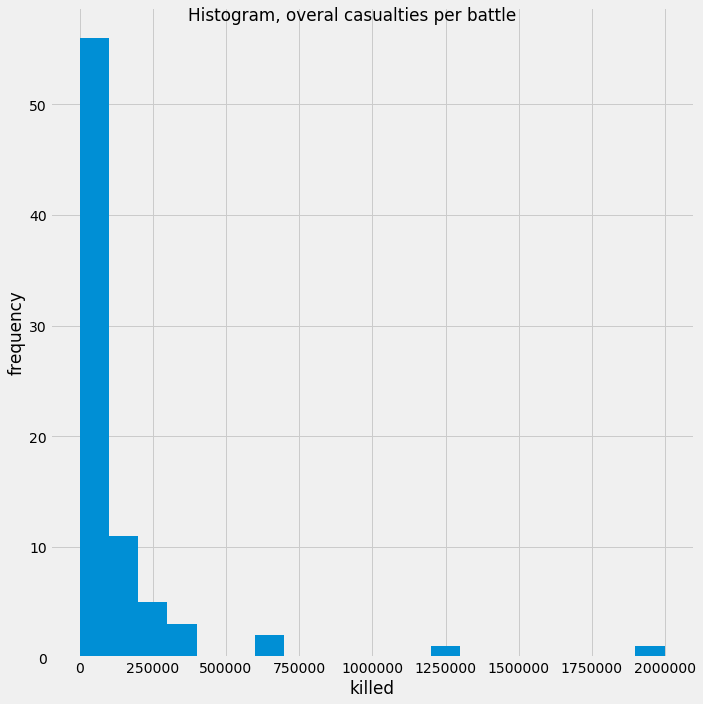

In [17]:
data.loc[~mask, 'killed total'].hist(bins=20, figsize=(10,10))
plt.suptitle('Histogram, overal casualties per battle')
plt.xlabel("killed")
plt.ylabel("frequency")
plt.tight_layout();

# Aggregates

In [18]:
aggr = data[~mask].groupby('parent').agg({'axis killed': ['sum', 'median', 'count'],
                                   'allies killed': ['sum', 'median'],
                                   'killed total': ['sum', 'median']}).astype(int)
aggr

axis killed               allies killed  \
                                          sum  median count           sum   
parent                                                                      
Axis invasion of the Soviet Union      440560   20364    12       2811366   
Battle for Narva Bridgehead               200     200     1          3000   
Battle of Berlin                        60000   60000     1         20000   
Battle of Kursk                         15057    7528     2        118029   
Battle of Smolensk (1943)                1500    1500     1          3000   
Battle of the Dnieper                    2628    2628     1         28141   
Battle of the Oder-Neisse               12000   12000     1         33000   
Case Blue                              887374  443687     2       1420141   
Dnieper–Carpathian Offensive            75000   37500     2        147490   
East Prussian Offensive                130000   65000     2        206780   
Eastern Front                          907502   24739    23        760610   
German Invasion of Poland               22045     800    11        165874   
Lower Silesian Offensive                 6000    6000     1         13000   
Narva Offensive (July 1944)              2500    2500     1         35000   
Operation Bagration                     41700   41700     1         11014   
Operation Polyarnaya Zvezda              3645    3645     1         20000   
Operation Spring Awakening              10000   10000     1          2500   
Siege of Leningrad (1941–1944)          17893    8946     2         74025   
Siege of Sevastopol (1941–1942)         38362   38362     1        570601   
Soviet Winter counter-offensive         53777   12000     3        270266   
Soviet invasion of Finland              36682    4500     4          2741   
Soviet invasion of Poland                1194     350     3           218   
Tallinn Offensive                         500     500     1          1000   
Vistula–Oder Offensive                   6100    6100     1         10700   

                                          killed total           
                                   median          sum   median  
parent                                                           
Axis invasion of the Soviet Union  103166      3251926   111681  
Battle for Narva Bridgehead          3000         3200     3200  
Battle of Berlin                    20000        80000    80000  
Battle of Kursk                     59014       133086    66543  
Battle of Smolensk (1943)            3000         4500     4500  
Battle of the Dnieper               28141        30769    30769  
Battle of the Oder-Neisse           33000        45000    45000  
Case Blue                          710070      2307515  1153757  
Dnieper–Carpathian Offensive        73745       222490   111245  
East Prussian Offensive            103390       336780   168390  
Eastern Front                       19713      1668112    52303  
German Invasion of Poland             663       187919     1560  
Lower Silesian Offensive            13000        19000    19000  
Narva Offensive (July 1944)         35000        37500    37500  
Operation Bagration                 11014        52714    52714  
Operation Polyarnaya Zvezda         20000        23645    23645  
Operation Spring Awakening           2500        12500    12500  
Siege of Leningrad (1941–1944)      37012        91918    45959  
Siege of Sevastopol (1941–1942)    570601       608963   608963  
Soviet Winter counter-offensive     88908       324043   100685  
Soviet invasion of Finland            576        39423     5451  
Soviet invasion of Poland              80         1412      431  
Tallinn Offensive                    1000         1500     1500  
Vistula–Oder Offensive              10700        16800    16800

In [19]:
idx = pd.IndexSlice

In [21]:
aggr[idx['axis killed', 'sum']].head(3)

parent
Axis invasion of the Soviet Union    440560
Battle for Narva Bridgehead             200
Battle of Berlin                      60000
Name: (axis killed, sum), dtype: int64

In [27]:
aggr.loc[:, idx[:, 'sum']].head(3)

,axis killed,allies killed,killed total
,sum,sum,sum
parent,,,
Axis invasion of the Soviet Union,440560,2811366,3251926
Battle for Narva Bridgehead,200,3000,3200
Battle of Berlin,60000,20000,80000


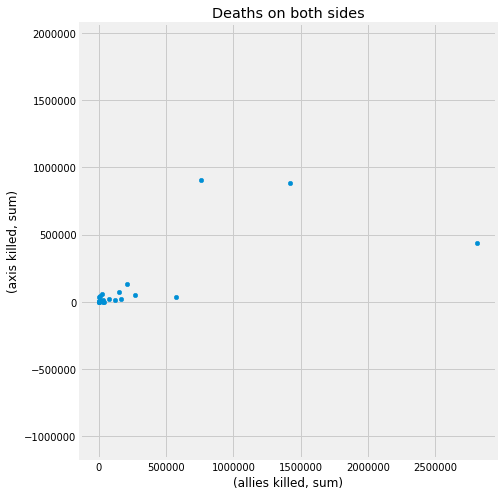

In [13]:
aggr.plotIndexSlicescatter',
          x=idx['allies killed', 'sum'],
          y=idx['axis killed', 'sum'],
          figsize=(7,7),
          title='Deaths on both sides')

plt.axis('equal');
plt.tight_layout();

# Timeline

In [14]:
ts = data[['axis killed', 'allies killed', 'end']].copy()

In [15]:
ts = ts.set_index('end').sort_index()

In [16]:
r = ts.resample('1Y').agg('sum')
r

,axis killed,allies killed
end,,
1939-12-31,23727.0,166092.0
1940-12-31,36682.0,2741.0
1941-12-31,226230.0,1644334.0
1942-12-31,346949.0,2300836.0
1943-12-31,1110704.0,1456498.0
1944-12-31,640690.0,770208.0
1945-12-31,684689.0,622996.0


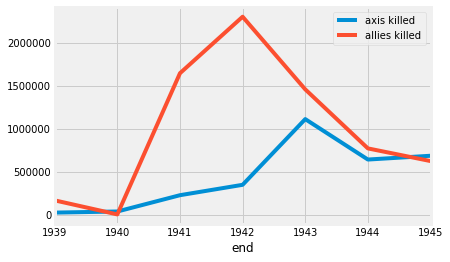

In [17]:
r.plot()

# Map

In [46]:
import geopandas as gp
url = 'https://unpkg.com/world-atlas@1/world/50m.json'

In [47]:
MERCATOR = {'init': 'epsg:4326', 'no_defs': True}

In [49]:
borders = gp.read_file(url)
borders.crs = MERCATOR

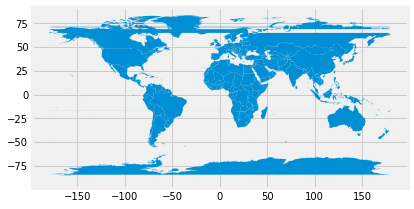

In [51]:
borders.plot()

In [54]:
borders = borders.to_crs(epsg=3035)

In [68]:
gdf = gp.GeoDataFrame(
    data, geometry=gp.points_from_xy(data['Longitude'], data['Lattitude']), crs=MERCATOR
    ).to_crs(borders2.crs)

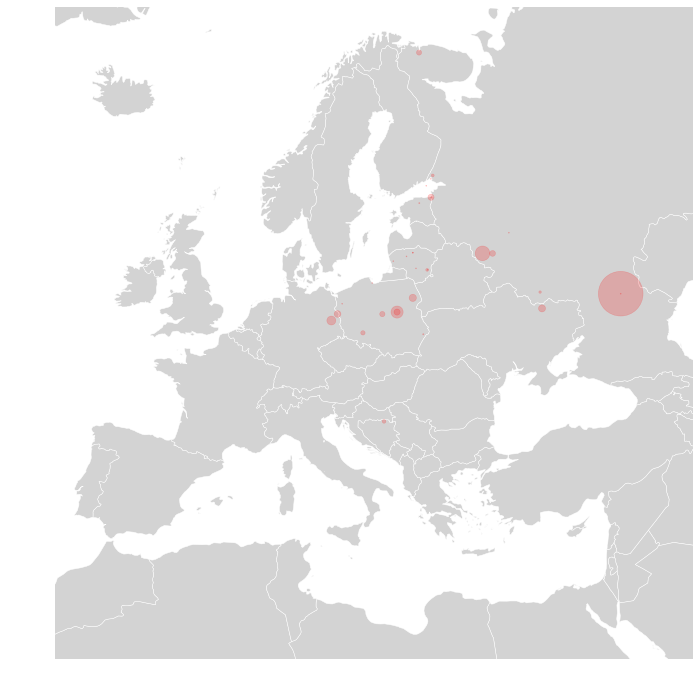

In [84]:
ax=borders2.plot(color='lightgrey', edgecolor='white', figsize=(12,12))
gdf.plot(ax=ax, color='red', markersize=(data['killed total']/1000).clip(lower=1), alpha=.2);

ax.margins(x=-.4, y=-0.4)   # Values in (-0.5, 0.0) zooms in to center
ax.set_axis_off()